# Гликолиз

$$y_1' = 1 - y_1y_2$$
$$y_2' = \alpha (y_1 - \frac{1+\beta}{y_2+\beta})$$

/home/ased/anaconda3/lib/python3.5/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


<IPython.core.display.Javascript object>


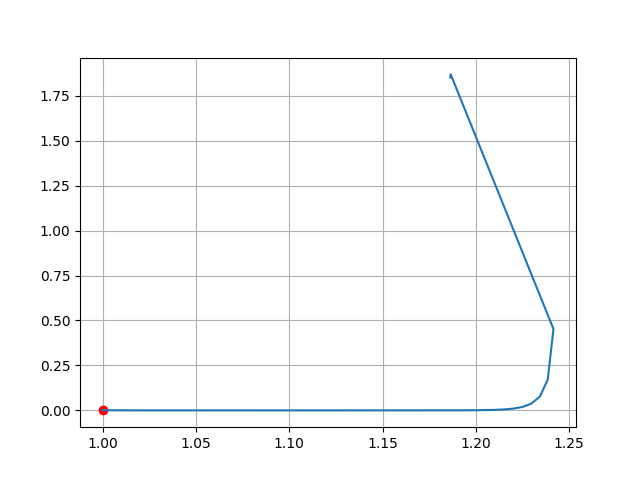

In [8]:
from glycolysis import glyc
import matplotlib.pyplot as plt
% matplotlib notebook

T_k = 50
l = glyc(1000, 10, [1, 1e-3], 0, T_k)
N = 10000
q = l.get_solution(N)
plt.plot(1, 1e-3, 'ro')
plt.grid()
plt.plot([i[0] for i in q], [i[1] for i in q])
plt.show()

<IPython.core.display.Javascript object>


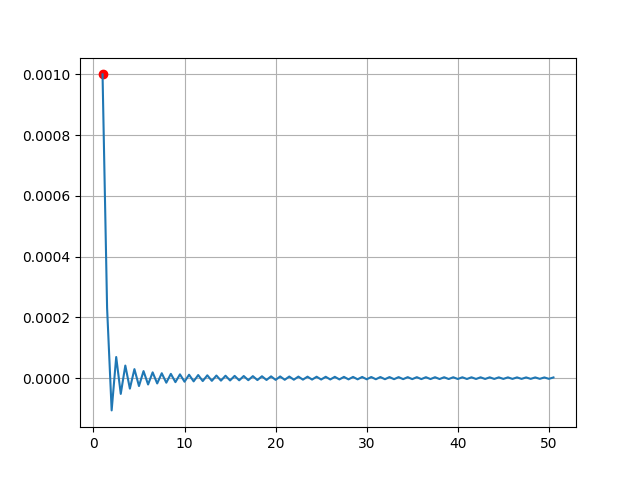

In [8]:
% matplotlib notebook

T_k = 50
l = glyc(400, 10, [1, 1e-3], 0, T_k)
N = 100
q = l.get_solution(N)
plt.plot(1, 1e-3, 'ro')
plt.grid()
plt.plot([i[0] for i in q], [i[1] for i in q])
plt.show()

# Уравнение Теплопроводности

<IPython.core.display.Javascript object>


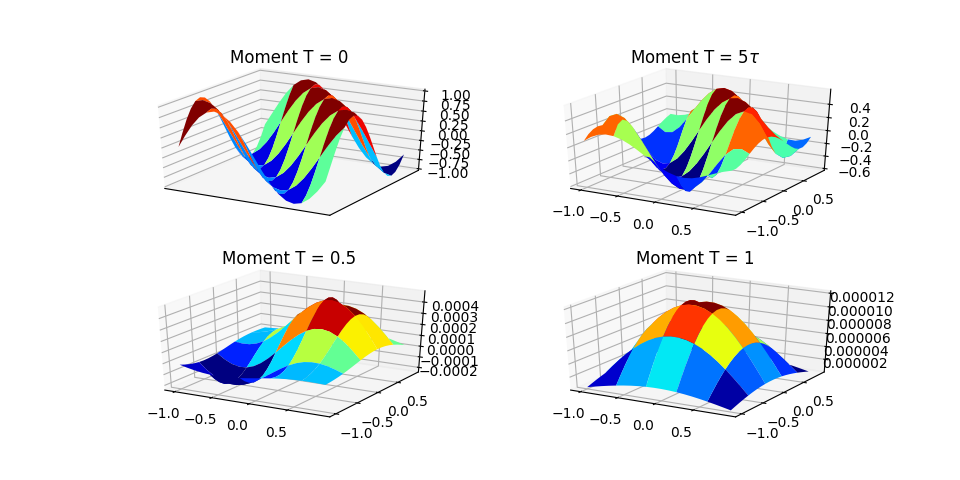

In [7]:
from solver import solver
import numpy as np
import math
dt = 0.004
h = 0.1
T = 1
size = 2
x, y = np.arange(-size / 2, size/2, h), np.arange(-size / 2, size/2, h)
x, y = np.meshgrid(x, y)
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy
%matplotlib notebook

def show(res):
    M = int(len(res) / 10)

    fig = plt.figure(figsize=plt.figaspect(0.5))

    axes = fig.add_subplot(2, 2, 1, projection='3d')
    L = int(size / h / 2)
    plt.title("Moment T = 0")
    plt.grid()
    z = res[0]
    plt.xticks([])
    plt.yticks([])
    axes.plot_surface(x, y, z, rstride=4, cstride=4, cmap = cm.jet)

    axes = fig.add_subplot(2, 2, 2, projection='3d')
    plt.title(r"Moment T = 5$\tau$")
    plt.grid()
    z = res[5]
    axes.plot_surface(x, y, z, rstride=4, cstride=4, cmap = cm.jet)

    axes = fig.add_subplot(2, 2, 3, projection='3d')
    plt.title("Moment T = 0.5")
    plt.grid()
    z = res[5 * M]
    axes.plot_surface(x, y, z, rstride=4, cstride=4, cmap = cm.jet)

    axes = fig.add_subplot(2, 2, 4, projection='3d')
    plt.title("Moment T = 1")
    plt.grid()
    z = res[-1]
    axes.plot_surface(x, y, z, rstride=4, cstride=4, cmap = cm.jet)
res = solver(1, lambda x, y: np.sin((x+y) * math.pi), size).first(T, dt, h)
show(res)